In [1]:
# 提取特征的Demo
# 1.加载VGG16预训练模型
# 2.示例图片提取特征
# 3.保存模型（saved_model）以便后面调用
# 4.将特征提取做成类，方便后面批量提取使用

In [2]:
# 导入相关包
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

In [4]:
from tensorflow.keras.preprocessing import image

In [5]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [6]:
#  include_top：会增加AVG，全连接层
#  使用imagenet预训练模型
#  pooling='avg'将输出变成2048的向量
resnet50 = ResNet50(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
# resnet50.summary()

In [7]:
# resnet50.summary()

In [8]:
#  include_top：会增加全连接层，输出1000类，我们不需要
#  使用imagenet预训练模型
#  pooling='avg'将输出变成512的向量
vgg16 = VGG16(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))

In [11]:
# vgg16.summary()

In [12]:
# 预处理
def preprocessImage(fileName):
    img = image.load_img(fileName, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


In [13]:
def extractFeat(model,fileName):
    img = preprocessImage(fileName)
    # 预测
    feat = model.predict(img)
    # L2归一化
    norm_feat = feat[0]/np.linalg.norm(feat[0])
    return norm_feat

In [14]:
test_img = preprocessImage('images/test (1).jpg')

In [15]:
test_img.max()

151.061

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


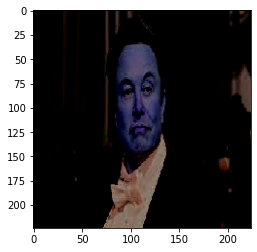

In [16]:
plt.imshow(test_img.astype("int")[0])

In [ ]:
import glob

In [ ]:
images = glob.glob('./images/*.jpg')

In [ ]:
images

In [ ]:
feat_list = []
for img in images:
    feat = extractFeat(vgg16,img)
    feat_list.append(feat)
    
feat_list = np.array(feat_list)

In [ ]:
feat_list.shape

In [ ]:
np.linalg.norm((feat_list[2]-feat_list),axis=1)

In [ ]:
# PIL array([1.082082 , 1.1800132, 1.0578845, 0.       ], dtype=float32)
# default array([1.057582 , 1.1911709, 1.0232438, 0.       ], dtype=float32)


In [ ]:
feat_list.shape

In [ ]:
# 保存模型，方便后面使用
vgg16.save('./weights/vgg16')

In [ ]:
# 包装成类，给后面使用